In [1]:
import os 
import shutil
import random
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Define Paths

Base_dir = os.path.dirname(os.path.abspath(os.getcwd()))
raw_data_path = os.path.join(Base_dir, 'data','raw','TB_Chest_Radiography_Database')
processed_data_path = os.path.join(Base_dir, 'data', 'processed')

print(f"Raw Data is located at: {raw_data_path}")
print(f"Processed Data will be saved at: {processed_data_path}")

Raw Data is located at: e:\Github Repositories\Tuberculosis-Detection\data\raw\TB_Chest_Radiography_Database
Processed Data will be saved at: e:\Github Repositories\Tuberculosis-Detection\data\processed


In [3]:
if not os.path.exists(raw_data_path):
    print(f"Raw data not found")
else:
    print("Data found. Proceeding with processing...")

Data found. Proceeding with processing...


In [4]:
normal_images = glob(os.path.join(raw_data_path, 'Normal', '*.png'))
tb_images = glob(os.path.join(raw_data_path, 'Tuberculosis', '*.png'))

print(f"\nNumber of Normal images: {len(normal_images)}")
print(f"Number of Tuberculosis images: {len(tb_images)}")


Number of Normal images: 3500
Number of Tuberculosis images: 700


In [7]:
#Check for class imbalance

total = len(normal_images) + len(tb_images)
print(f"\nTotal images: {total}")
print(f"Percentage of Normal images: {(len(normal_images)/total) * 100:.2f}%")
print(f"Percentage of Tuberculosis images: {(len(tb_images)/total) * 100:.2f}%")


Total images: 4200
Percentage of Normal images: 83.33%
Percentage of Tuberculosis images: 16.67%


In [9]:
type(normal_images), type(tb_images)

(list, list)

In [17]:
#Func to display sample images from each class

def samples(image_lst, title, num_samples=10):
    plt.figure(figsize=(15,5))
    plt.suptitle(title,fontsize=16) #sets super title
    
    for i, img_path in enumerate(random.sample(image_lst, min(num_samples, len(image_lst)))):
        img = Image.open(img_path).convert('L') # Convert to grayscale
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    plt.show()

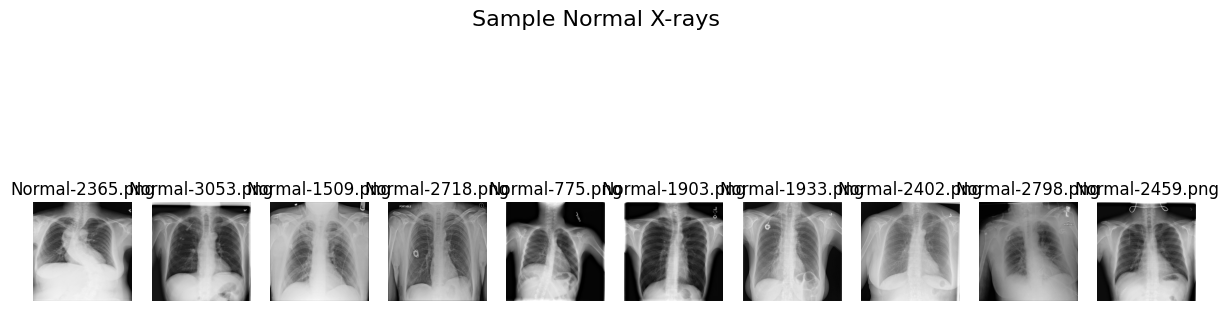

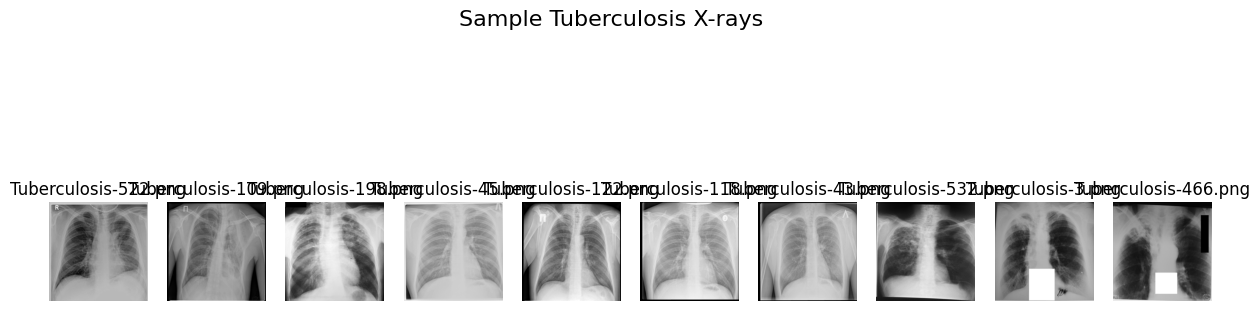

In [18]:
samples(normal_images, "Sample Normal X-rays")
samples(tb_images, "Sample Tuberculosis X-rays")

In [19]:
#Checking img dimensions

sample_path = random.sample(normal_images+tb_images, 10) #randomly chooses 5 img from given list and forms another list
for path in sample_path:
    img = Image.open(path)
    print(f"{os.path.basename(path)}: {img.size} (Width x Height), Mode: {img.mode}")
    
print(f"EDA Completed!")


Normal-2894.png: (512, 512) (Width x Height), Mode: RGB
Normal-3081.png: (512, 512) (Width x Height), Mode: RGB
Normal-2519.png: (512, 512) (Width x Height), Mode: RGB
Tuberculosis-42.png: (512, 512) (Width x Height), Mode: L
Tuberculosis-207.png: (512, 512) (Width x Height), Mode: RGB
Normal-1754.png: (512, 512) (Width x Height), Mode: RGB
Tuberculosis-102.png: (512, 512) (Width x Height), Mode: L
Normal-1523.png: (512, 512) (Width x Height), Mode: RGB
Normal-2878.png: (512, 512) (Width x Height), Mode: RGB
Normal-2807.png: (512, 512) (Width x Height), Mode: RGB
EDA Completed!
